In [9]:
# Importing Module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Loading Dataset
true=pd.read_csv('../data/raw/True.csv')
fake=pd.read_csv('../data/raw/Fake.csv')

fake['label']=1
true['label']=0

data=pd.concat([fake,true])
data=data.sample(frac=1, random_state=42).reset_index(drop=True)

data.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


In [16]:
data.tail()


,title,text,subject,date,label
44893,UNREAL! CBS’S TED KOPPEL Tells Sean Hannity He...,,politics,"Mar 27, 2017",1
44894,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",0
44895,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",0
44896,Trump Stole An Idea From North Korean Propaga...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",1
44897,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,politics,"Apr 23, 2015",1


In [17]:
print("Shape:", data.shape)
data.info()

Shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [18]:
data["label"].value_counts()

label
1    23481
0    21417
Name: count, dtype: int64

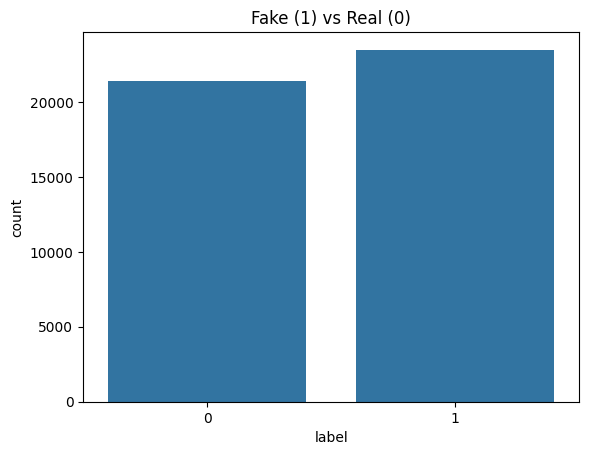

In [19]:
sns.countplot(x="label", data=data)
plt.title("Fake (1) vs Real (0)")
plt.show()

In [20]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

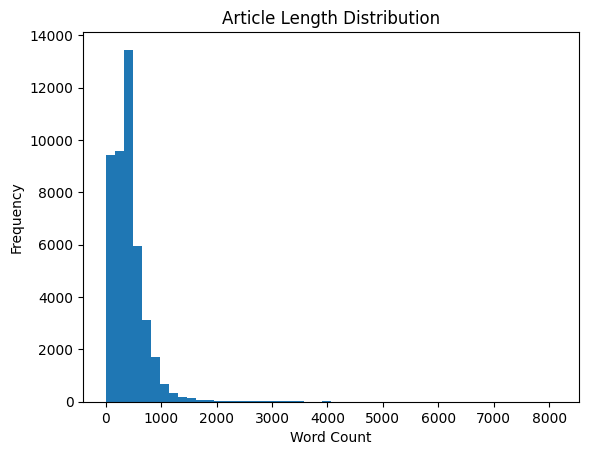

In [21]:
data["article_length"] = data["text"].apply(lambda x: len(str(x).split()))

plt.hist(data["article_length"], bins=50)
plt.title("Article Length Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [22]:
data.to_csv("../data/interim/merged.csv", index=False)